# Part 1: Football ⚽

# Abstract

## Football Data

In this part, I will analyze the confidence interval of winning, losing, and getting a draw of three countries: Egypt, Brazil, and Sri Lanka. I have chosen these countries as a range of perceived skill level of the football teams and I think they will help reach a few conclusions. I analyzed each team in Home, Friendly, and Official environments as well as their graphs for an optimal understanding of their skill overall

## COVID-19 Data

In this part, I analyze the death and case rate of various countries and regions in order to achieve a contextual and global understanding of the impact the COVID-19 virus has had on the world in the years 2020 and 2021. Equipped with knowledge of global pandemics from a TED Talks video and social media voicings of the opinions of the people of different nations, I interpret the graphs (which I use matplotlib to make) through the lens of real-world events.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/ammaryasser/Desktop/results.csv')

In [3]:
goals=df['home_score']-df['away_score']
conditions = [
    (goals<0),
    (goals>0),
    (goals==0)
    ]
values= ['win','lose','draw']

In [4]:
df['result'] = np.select(conditions, values)

# Egypt 🇪🇬

In [5]:
dfegy=df[df['country']=='Egypt'] #from asmr practice solution
dfegy['result'].value_counts(normalize=True)

egyallresultvc=dfegy['result'].value_counts()#practice solution
egyallresultssum=egyallresultvc.sum()
egycount = dfegy['result'].value_counts()

CI_winegyall=proportion_confint(count=egycount[1],nobs=egyallresultssum,alpha=(1-.95))
print(CI_winegyall)

CI_loseegyall=proportion_confint(count=egycount[0],nobs=egyallresultssum,alpha=(1-.95))
print(CI_loseegyall)

(0.18540872044458956, 0.26667973164386255)
(0.5368938422372662, 0.6326393272959032)


Unfortunately for Egypt, it seems the team has a much higher likelihood of losing than winning; almost double! This could be because the team plays mostly against international teams in the dataset. As such, Egypt doesn't play on home pitch the majority of the time. As we will see, this has a great bearing on the outcome of the games.

In [6]:
dfegyfriend=dfegy[dfegy['tournament']=='Friendly'] #from asmr practice solution
dfegyfriend['result'].value_counts(normalize=True)

dfegyafr=dfegy[dfegy['tournament']=='African Cup of Nations'] #from asmr practice solution
dfegyafrresultsvc=dfegyafr['result'].value_counts()
dfegyafrresultssum=dfegyafrresultsvc.sum()
egyafrcount = dfegyafr['result'].value_counts()

CI_winegyafr=proportion_confint(count=egyafrcount[1],nobs=dfegyafrresultssum,alpha=(1-.95))
print(CI_winegyafr)

CI_loseegyafr=proportion_confint(count=egyafrcount[0],nobs=dfegyafrresultssum,alpha=(1-.95))
print(CI_loseegyafr)

(0.22406212255240388, 0.39132249283221154)
(0.37120753746320173, 0.5518693856137213)


This is a better look for our home team. In the friendly matches, it seems Egypot has a much higher likelihood of winning. I hypothesize this to be because the team may not be as stressed while playing. Of course, a player's mental status has a great impact on their performance. As such, a less stressed player will perform better than a player under pressure to win. Another factor is the impact of the audience. Friendly matches tend to have fewer people in the audience than competitive matches. This could affect the players in that they do not have as much social pressure to win (which would be exacerbate stress.)

In [7]:
conditions = [
    (dfegy['tournament']=='Friendly'),
    (dfegy['tournament']!='Friendly')
]
tournamentvalues=['Friendly','Official']
dfegy['typematch'] = np.select(conditions, tournamentvalues)
crosstabegy=pd.crosstab(dfegy['typematch'],dfegy['result'],margins=True)
crosstabegyarr=np.array(crosstabegy)

CI_egywin_friendly=proportion_confint(count=crosstabegyarr[0,2],nobs=crosstabegyarr[0,3],alpha=(1-.95))
print(CI_egywin_friendly)

CI_egywin_official=proportion_confint(count=crosstabegyarr[1,2],nobs=crosstabegyarr[1,3],alpha=(1-.95))
print(CI_egywin_official)

(0.1856528084886489, 0.3115847605721246)
(0.1550517855722795, 0.2608774179675435)


<ipython-input-7-42819642b8e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['typematch'] = np.select(conditions, tournamentvalues)


Huzzah! It seems that Egypt has a higher chance of winning if they are in friendly matches than in official matches. On second thought, is this really the best outcome? I'll leave that argument to the soccer heads, which I am very much not!

Anyway, I think we have a higher chance of winning (but only by approximately 5%) because of the stress put on Egyptian players in Official matches. This no doubt impacts their psyche and their ability to perform. Another point is that in Official matches, teams are more well-prepared, which would definitely affect each team's performance.

Side note: I find analyzing groups of people from data to be so fun! I think it bridges the objective subject of Data Science with the much more subjective sociology – two of my top fields :)

([<matplotlib.axis.YTick at 0x7fd7d00e6a90>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

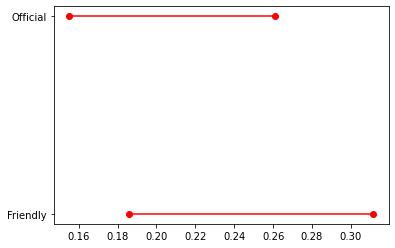

In [8]:
ci_egywin = {}
ci_egywin['Typematch'] = ['Friendly','Official']
ci_egywin['lb'] = [CI_egywin_friendly[0],CI_egywin_official[0]]
ci_egywin['ub'] = [CI_egywin_friendly[1],CI_egywin_official[1]]
df_ci= pd.DataFrame(ci_egywin)

for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

This is just a graph of the confidence intervals. It shows significant overlap between the Official and Friendly confidence intervals but does exhibit a wider CI for Friendly matches – there seems to be more variability in Friendly matches. Perhaps this could be because Egypt goes against more teams in Friendly matches?

In [9]:
dfegy['home']=(dfegy['home_team']=='Egypt')
crosstabegyhome=pd.crosstab(dfegy['home'],dfegy['result'],margins=True)
crosstabegyhomearr=np.array(crosstabegyhome)

<ipython-input-9-e838a08037ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfegy['home']=(dfegy['home_team']=='Egypt')


(0.12119174183927744, 0.21214159149405587)
(0.25342513144684364, 0.40429298935852553)


([<matplotlib.axis.YTick at 0x7fd7d026e760>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

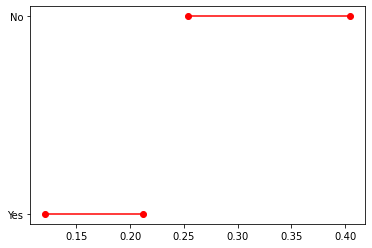

In [10]:
CI_egywin_home=proportion_confint(count=crosstabegyhomearr[1,2],nobs=crosstabegyhomearr[1,3],alpha=(1-.95))
CI_egywin_away=proportion_confint(count=crosstabegyhomearr[0,2],nobs=crosstabegyhomearr[0,3],alpha=(1-.95))

print(CI_egywin_home)
print(CI_egywin_away)
ci_egywin = {}
ci_egywin['home'] = ['Yes','No']
ci_egywin['lb'] = [CI_egywin_home[0],CI_egywin_away[0]]
ci_egywin['ub'] = [CI_egywin_home[1],CI_egywin_away[1]]
df_ci= pd.DataFrame(ci_egywin)
df_ci

for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

# Brazil 🇧🇷

In [11]:
dfbra=df[df['country']=='Brazil'] #from practice solution
dfbra['result'].value_counts(normalize=True)

dfbra['home']=(dfbra['home_team']=='Brazil')
crosstabbrahome=pd.crosstab(dfbra['home'],dfbra['result'],margins=True)
crosstabbrahomearr=np.array(crosstabbrahome)

brazilallresultvc=dfbra['result'].value_counts()#practice solution
braallresultssum=brazilallresultvc.sum()
bracount = dfbra['result'].value_counts()

CI_winbra=proportion_confint(count=bracount[1],nobs=braallresultssum,alpha=(1-.95))
print(CI_winbra)

<ipython-input-11-4faab644fce1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbra['home']=(dfbra['home_team']=='Brazil')


(0.17469816627835413, 0.24152758328072874)


I chose Brazil as an example for the confidence interval because they are widely regarded to be the best football team in the world – disregarding biased patriotism, of course!

Despite this reputation, it seems Brazil's data does not support the perceived excellence of the team. Moreover, this is the data from home base, which should exhibit a bias toward winning. I think maybe the team was perhaps too unstressed; maybe not putting in enough effort? The benefits of a home team is an example not only of diminishing returns, but actually reversing returns!

In [12]:
conditionsbra = [
    (dfbra['tournament']=='Friendly'),
    (dfbra['tournament']!='Friendly')
]
dfbra['typematch'] = np.select(conditionsbra, tournamentvalues)
crosstabbra=pd.crosstab(dfbra['typematch'],dfbra['result'],margins=True)
crosstabbraarr=np.array(crosstabbra)

CI_brawin_friendly=proportion_confint(count=crosstabbraarr[0,2],nobs=crosstabbraarr[0,3],alpha=(1-.95))
print(CI_brawin_friendly)

CI_brawin_official=proportion_confint(count=crosstabbraarr[1,2],nobs=crosstabbraarr[1,3],alpha=(1-.95))
print(CI_brawin_official)

(0.02043249489958943, 0.08266028860556521)
(0.23076768031938502, 0.32151114005595016)


<ipython-input-12-89173dbfc8a7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbra['typematch'] = np.select(conditionsbra, tournamentvalues)


This is another interesting datapoint. Brazil has a super, SUPER low chance of winning friendly matches. I can try to apply my stress hypothesis but I don't think it would impact the team THAT much. After all, professional footbalk players have played hundreds upon hundreds of matches, so stress can only affect them so much. Given the incredibly narrow CI, I think something may be wrong with the data as I would struggle to call a team that wins at most 8% of their matches good on any level

It does look better for the Brazilian team on the Official level. They have a relatively good chance of winning, at around 27.5% chance of winning with a much wider CI. I think this is a more reliable frame of reference for the ability of the team

([<matplotlib.axis.YTick at 0x7fd7d03f3940>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

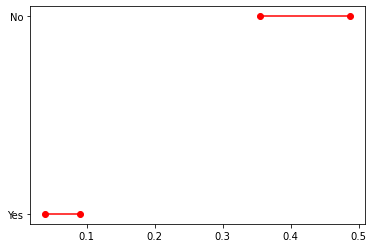

In [13]:
CI_brawin_home=proportion_confint(count=crosstabbrahomearr[1,2],nobs=crosstabbrahomearr[1,3],alpha=(1-.95))
CI_brawin_away=proportion_confint(count=crosstabbrahomearr[0,2],nobs=crosstabbrahomearr[0,3],alpha=(1-.95))

ci_brawin = {}
ci_brawin['home'] = ['Yes','No']
ci_brawin['lb'] = [CI_brawin_home[0],CI_brawin_away[0]]
ci_brawin['ub'] = [CI_brawin_home[1],CI_brawin_away[1]]
df_cibra= pd.DataFrame(ci_brawin)
df_cibra

for lb,ub,y in zip(df_cibra['lb'],df_cibra['ub'],range(len(df_cibra))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cibra)),list(df_cibra['home']))

Similar to the Egyptian graph, this shows the collective chance of losing OR drawing for th Brazilian team on home soil. Although it is mathematically sound, I struggle to believe the team has this much of a disparity between Friendly and Official matches. This gap is only worsened as we group losses and draws into the "No" category...

# Sri Lanka 🇱🇰

In [14]:
dfsri=df[df['country']=='Sri Lanka'] #from asmr practice solution
dfsri['result'].value_counts(normalize=True)
sriallresultvc=dfsri['result'].value_counts()#practice solution
sriallresultssum=sriallresultvc.sum()
sricount = dfsri['result'].value_counts()

dfsri['home']=(dfsri['home_team']=='Sri Lanka')
crosstabsrihome=pd.crosstab(dfsri['home'],dfsri['result'],margins=True)
crosstabsrihomearr=np.array(crosstabsrihome)

CI_winsri=proportion_confint(count=sricount[1],nobs=sriallresultssum,alpha=(1-.95))
print(CI_winsri)

(0.23166206386543675, 0.45405222184884897)


<ipython-input-14-b72a1885df43>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsri['home']=(dfsri['home_team']=='Sri Lanka')


I think this is quite a peculiar data point. Sri Lanka is arguably notorious for having a not-so-great team for football. I think this is because Sri Lankan culture does not place importance on football. Instead, the national sport of SL is volleyball. I did not expect this, but what's more important is the abnormal confidence interval. Sri Lanka actually has a much, much higher chance of winning a football match than Egypt *or* Brazil under the same conditions (being on home soil.)

I think this is due to sampling bias. Since Sri Lanka does not have a reputation for playing well, it underperforms in important matches that would lead them to play more advanced teams. In essence, the Sri Lankan team plays teams of a similar caliber. Moreover, they play fewer matches overall. This would lead to a sampling bias that would make the confidence interval much wider than normal.

Another show of CIs but this time, we're grouping losses AND draws into one, which renders the CIs essentially parallel and never overlapping. This makes sense as their is a higher likelihood to lose OR draw than to just lose or just draw.

In [15]:
conditionssri = [
    (dfsri['tournament']=='Friendly'),
    (dfsri['tournament']!='Friendly')
]
dfsri['typematch'] = np.select(conditionssri, tournamentvalues)
crosstabsri=pd.crosstab(dfsri['typematch'],dfsri['result'],margins=True)
crosstabsriarr=np.array(crosstabsri)

CI_sriwin_friendly=proportion_confint(count=crosstabsriarr[0,2],nobs=crosstabsriarr[0,3],alpha=(1-.95))
print(CI_sriwin_friendly)

CI_sriwin_official=proportion_confint(count=crosstabsriarr[1,2],nobs=crosstabsriarr[1,3],alpha=(1-.95))
print(CI_sriwin_official)

(0.11555955727332728, 0.5511071093933393)
(0.21684781359567715, 0.4754598787120151)


<ipython-input-15-88f40c70e105>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsri['typematch'] = np.select(conditionssri, tournamentvalues)


Sri Lanka is looking leagues ahead of Egypt and Brazil in this category – they actually have good odds at winning compared to either other team. If you consider the upper bound of the Friendly matches' CI, Sri Lanka actually has a higher chance of winning than losing! I didn't think the standards would be this low, but it seems this is the world of football.

([<matplotlib.axis.YTick at 0x7fd7d06178e0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

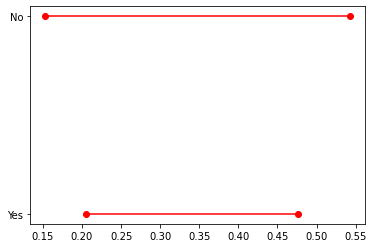

In [16]:
CI_sriwin_home=proportion_confint(count=crosstabsrihomearr[1,2],nobs=crosstabsrihomearr[1,3],alpha=(1-.95))
CI_sriwin_away=proportion_confint(count=crosstabsrihomearr[0,2],nobs=crosstabsrihomearr[0,3],alpha=(1-.95))

ci_sriwin = {}
ci_sriwin['home'] = ['Yes','No']
ci_sriwin['lb'] = [CI_sriwin_home[0],CI_sriwin_away[0]]
ci_sriwin['ub'] = [CI_sriwin_home[1],CI_sriwin_away[1]]
df_cisri= pd.DataFrame(ci_sriwin)
df_cisri

for lb,ub,y in zip(df_cisri['lb'],df_cisri['ub'],range(len(df_cisri))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cisri)),list(df_cisri['home']))

Sri Lanka's incredibly wide confidence intervals caused by sampling issues.


I want to conclude this analysis by saying that I think it is fundamentally flawed. I don't think anyone is denying that Brazil is an objectively better team than Sri Lanka, yet the numbers say otherwise. I think this is an example of how Data Science – and by extension, math – cannot be used in a vaccuum. On one hand, saying that Sri Lanka is a better team simply misses the glaring issue in the sample and does not credit real-life experiences. On the other hand, labeling Brazil as the superior team automatically ignores the achievements of the Sri Lankan team. This is why a good Data Scientist must analyze and interpret their data in the context of as many variables and scenarios as possible so as to obtain a complete picture of the data!

# Part 2: COVID-19 Data

This is the second part of the second assignment focused on the COVID-19 data. Just as a side note, I enjoyed this dataset a lot more than the first part since I'm not really into football...

In [17]:
import pandas as pd
from pandas import Series
from pandas.api.types import CategoricalDtype
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

#Importing all the necessary packages

In [18]:
df=pd.read_csv('/Users/ammaryasser/Desktop/covid_data.csv',encoding='latin-1')

#setting df

In [19]:
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

#from practice sheet

In [20]:
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

#from practice sheet

In [21]:
print(df['dcases'].sum())
print(df['ddeaths'].sum())

#number of cases and deaths

289138394
5441088


In [22]:
df['dcases'].sum()/df['ddeaths'].sum()

#ratio between cases and deaths

53.13981211110719

This is the ratio between the number of cases and the number of deaths worldwide across all regions and 2020 to 2021. The value means there are around 53 times more cases than deaths. That gives approximatly a 1/53 chance of dying from COVID-19. That's equal to ≈ 2%. Google (https://www.google.com/search?q=covid+19) suggests the total number of cases is around 503,000,000 and the number of deaths is 6,190,000. That gives a 1.23% chance of death. This discrepancy between the data's death rate and Google's death rate is that the dataset stops before 2022. 2022 saw more people getting vaccinated. Vaccinations have been shown to decrease death rate, so the pre-2022 death rate would be slightly higher than during 2022.

In [23]:
dfli = df[df['income'] == 'Low income']
print(dfli['dcases'].sum()/dfli['ddeaths'].sum())

dfhi = df[df['income'] == 'High income']
print(dfhi['dcases'].sum()/dfhi['ddeaths'].sum())

#Low-income vs high-income death rate

50.16543123206211
69.7100337253448


This datapoint was a bit surprising to me as I expected low-income countries to have a higher death rate than higher-income countries. However, I realized that higher-income countries tend to have a population that skews toward being older-aged. COVID-19 has shown a bias toward being more fatal to those who are older. This would mean the likelihood of death would be higher in lower-income countries.

# Egypt

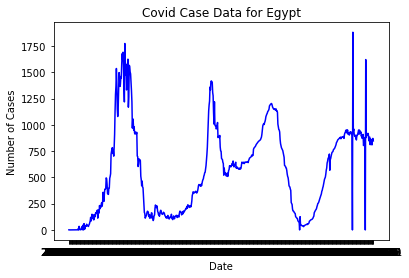

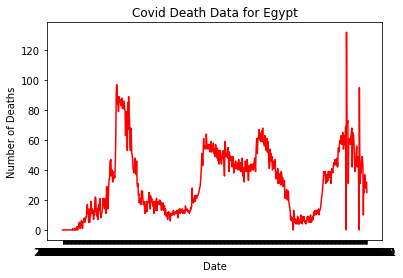

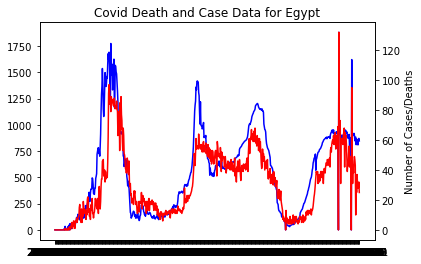

In [24]:
dfegy = df[df['country'] == 'Egypt']
dfegy['dcases'].sum()/dfegy['ddeaths'].sum()

plt.plot(dfegy['date'], dfegy['dcases'], color = 'b')
plt.title("Covid Case Data for Egypt")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(dfegy['date'], dfegy['ddeaths'], color = 'r')
plt.title("Covid Death Data for Egypt")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x = dfegy['date']
y1 = dfegy['dcases']
y2 = dfegy['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x,y1, color = 'b')
curve2 = ax2.plot(x,y2, color = 'r')
plt.title("Covid Death and Case Data for Egypt")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")
plt.plot()
plt.show()

#Graphing data from egypt of deaths and overall cases
#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

This is a graph of Egypt with daily cases and daily deaths graphed together. I just want to say when I got this from a YouTube tutorial I was actually over the moon because the fact that you could layer two things? AMAZING!!

Anyway, this visually shows that Egypt had 3 waves of COVID coinciding with the waves of death. These can be attributed to different variants and different public perceptions of health protocols;

The first wave was the beginning of the pandemic. Fear and uncertainty rendered the Egyptian populus unready to deal with the new disease. Coupled with a lack of vaccine or treatment options, cases soared into the late 1000s, a number that would remain unparalleled even today.

The dip we can see after the first wave can be attributed to a more prepared country. A prevalence of masks and hand sanitizer adjoined with a surgence of public caution helped keep cases low.

The second wave can be explained by the Beta variant, which proved to be more contagious than the Alpha variant which came before it.

The third wave could be explained by the rolling of summer, which increases international travel.

The dip after the third wave could have been caused by an all-time high of vaccination rates, which decreases transmission of the virus by decreasing individual viral load as the body is better prepared to fight the virus.

We can see a few major anomalies in the graph toward the end as there are inexplicable spikes in death and cases. I do not know exactly why this happened, but I think there was an issue either with case reporting or with the dataset itself...

# Afghanistan

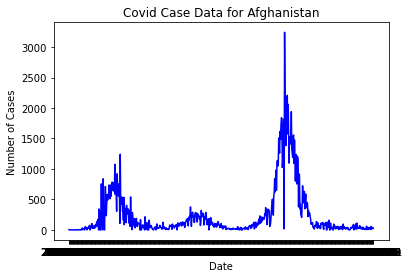

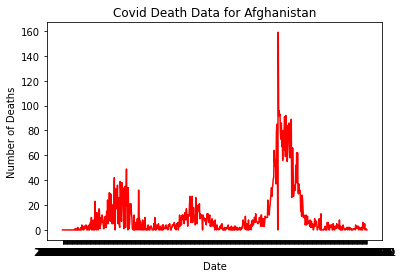

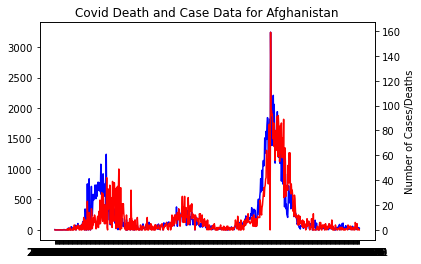

In [25]:
dfafg = df[df['country'] == 'Afghanistan']
dfafg['dcases'].sum()/dfafg['ddeaths'].sum()

plt.plot(dfafg['date'], dfafg['dcases'], color = 'b')
plt.title("Covid Case Data for Afghanistan")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(dfafg['date'], dfafg['ddeaths'], color = 'r')
plt.title("Covid Death Data for Afghanistan")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


xafg = dfafg['date']
y1afg = dfafg['dcases']
y2afg = dfafg['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(xafg,y1afg, color = 'b')
curve2 = ax2.plot(xafg,y2afg, color = 'r')
plt.title("Covid Death and Case Data for Afghanistan")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")
plt.plot()
plt.show()

#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

This is Afghanistan's covid data. Some important things to note about Afganistan are that it is a low-income country and it is located in South Asia. Although I will not be able to give as detailed an analysis as I did with Egypt because I haven't been to Afghanistan, I can point out a few key aspects of the graph. For one, the first wave of cases in Afghanistan and the first wave of deaths are offset from each other. This suggests that some people had COVID for a while before passing. It also seems that there is a lack of distinct waves, unlike Egypt, with the exception of two major waves at the beginning and around 4/5ths way into the set.

# Low-income vs High-income Countries and COVID

In [26]:
df2020 = df[df['date'] <= '2020-12-31']
df2021 = df[df['date'] >= '2021-01-01']

#making a dataframe with specific date ranges

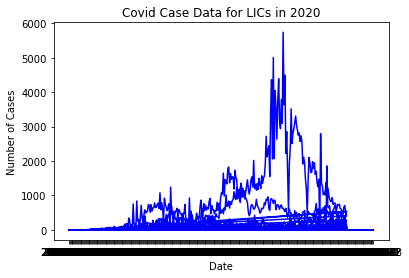

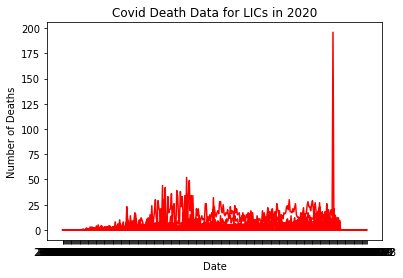

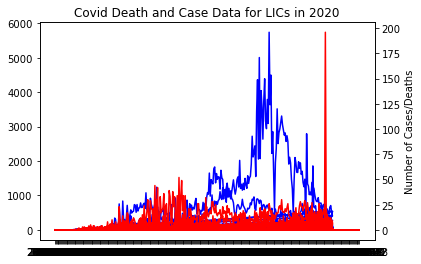

In [27]:
df2020li = df2020[df2020['income'] == "Low income"]


plt.plot(df2020li['date'], df2020li['dcases'], color = 'b')
plt.title("Covid Case Data for LICs in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2020li['date'], df2020li['ddeaths'], color = 'r')
plt.title("Covid Death Data for LICs in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x2020li = df2020li['date']
y1_2020li = df2020li['dcases']
y2_2020li = df2020li['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x2020li,y1_2020li, color = 'b',)
curve2 = ax2.plot(x2020li,y2_2020li, color = 'r')
plt.title("Covid Death and Case Data for LICs in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")
plt.plot()
plt.show()

#same as above
#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

This is a superimposed graph of Low-Income countries' (LICs) cases and deaths. As we can see, LICs tend to have a high number of cases but a relatively low number of deaths. This can be attributed to LICs skwewing to being younger.

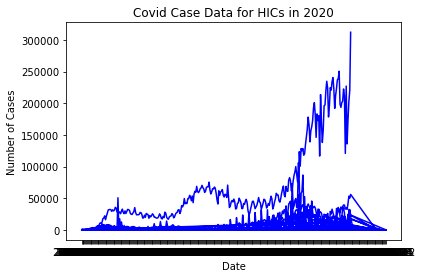

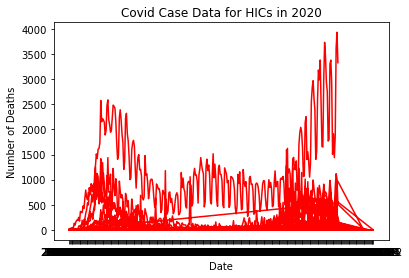

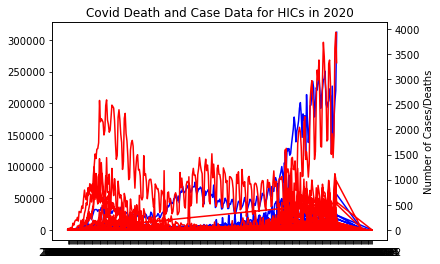

In [28]:
df2020hi = df2020[df2020['income'] == "High income"]


plt.plot(df2020hi['date'], df2020hi['dcases'], color = 'b')
plt.title("Covid Case Data for HICs in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2020hi['date'], df2020hi['ddeaths'], color = 'r')
plt.title("Covid Case Data for HICs in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x2020hi = df2020hi['date']
y1_2020hi = df2020hi['dcases']
y2_2020hi = df2020hi['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


curve1 = ax1.plot(x2020hi,y1_2020hi, color = 'b')
curve2 = ax2.plot(x2020hi,y2_2020hi, color = 'r')

plt.title("Covid Death and Case Data for HICs in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")
plt.plot()
plt.show()

#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

This graph is very interesting. We can see that, conversely to LICs, HICs consistently have higher death rates than LICs. This can be explained by the age skew and overflowing of medical centers; HICs tend to have more international travel which would introduce more new vectors of transmission compared to LICs.

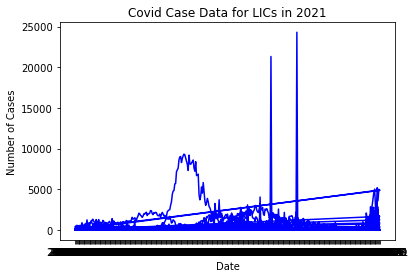

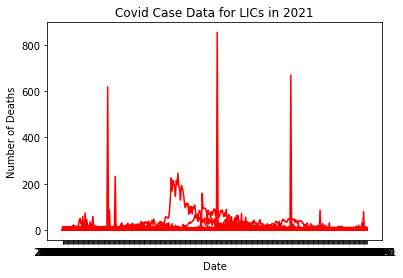

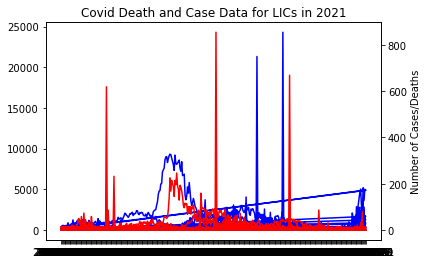

In [29]:
df2021_li = df2021[df2021['income'] == "Low income"]


plt.plot(df2021_li['date'], df2021_li['dcases'], color = 'b')
plt.title("Covid Case Data for LICs in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2021_li['date'], df2021_li['ddeaths'], color = 'r')
plt.title("Covid Case Data for LICs in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x2021_li = df2021_li['date']
y1_2021_li = df2021_li['dcases']
y2_2021_li = df2021_li['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x2021_li,y1_2021_li, color = 'b')
curve2 = ax2.plot(x2021_li,y2_2021_li, color = 'r')
plt.title("Covid Death and Case Data for LICs in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")

plt.plot()
plt.show()

#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

Unfortunately, this graph has too many anomalies and errors to provide an informed explanations. However, excluding the anomalies, we can see again that LICs have lower death rates than HICs. The difference here is the number of cases. Both the number of cases and number of deaths are around 4x higher than in 2020. This could be explained by less enforcement of health protocols caused by a strained economy and high demand of jobs.

# The US...What Happened?

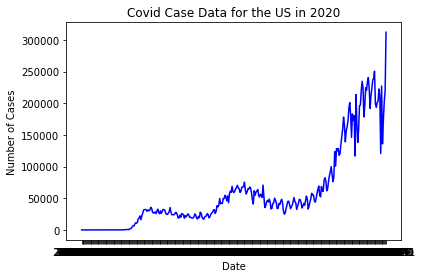

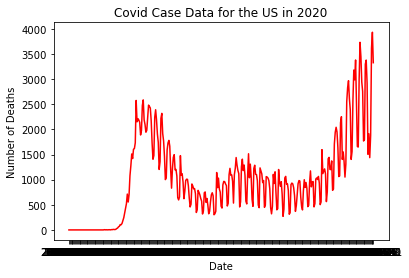

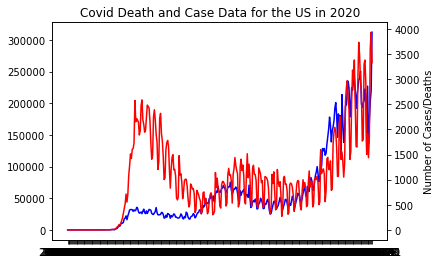

In [30]:
df2020us = df2020[df2020['country'] == "United States"]


plt.plot(df2020us['date'], df2020us['dcases'], color = 'b')
plt.title("Covid Case Data for the US in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2020us['date'], df2020us['ddeaths'], color = 'r')
plt.title("Covid Case Data for the US in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x_us2020 = df2020us['date']
y1_us2020 = df2020us['dcases']
y2_us2020 = df2020us['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x_us2020,y1_us2020, color = 'b')
curve2 = ax2.plot(x_us2020,y2_us2020, color = 'r')
plt.title("Covid Death and Case Data for the US in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")

plt.plot()
plt.show()

#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

This is a graph of America's numbers of cases vs deaths. I chose this country because it is arguably the most significant nation aside from China in the pandemic. We can see a steady increase in cases at the beginning and then a slight dip and then a sharp increase. The most glaring issue in the graph is the incredibly high death rate at the beginning. The American populus is, on average, relatively old compared to the global mean and median. Moreover, America had very lax health restrictions at the beginning, so hospitals were overlflowing with patients. Similar to Italy, America's healthcare workers were inundated with cases and could not handle the influx of patients. We see a continuously increasing number of cases at the tail end of 2020. America is home to the one of the largest group of those who are against vaccination – "anti-vaxers." This impact of the COVID vaccine's public perception has no doubt had a large effect on vaccination rates and health of the public. We will see how this played out in 2021 in the next graph.

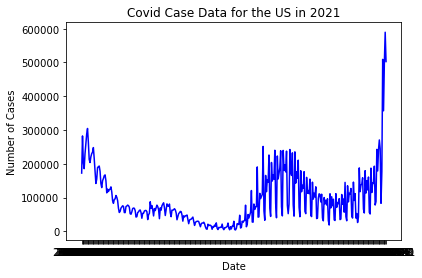

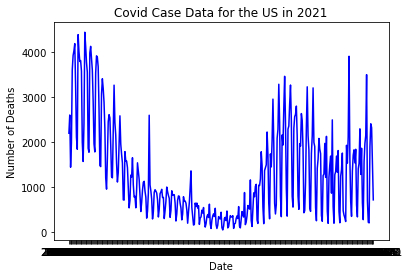

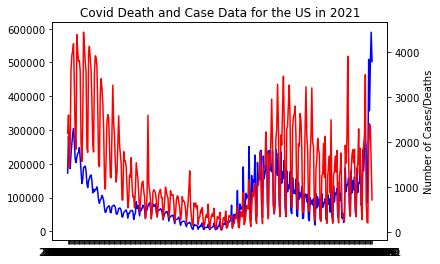

In [31]:
df2021us = df2021[df2021['country'] == "United States"]


plt.plot(df2021us['date'], df2021us['dcases'], color = 'b')
plt.title("Covid Case Data for the US in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2021us['date'], df2021us['ddeaths'], color = 'b')
plt.title("Covid Case Data for the US in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x_us2021 = df2021us['date']
y1_us2021 = df2021us['dcases']
y2_us2021 = df2021us['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x_us2021,y1_us2021, color = 'b')
curve2 = ax2.plot(x_us2021,y2_us2021, color = 'r')
plt.title("Covid Death and Case Data for the US in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")

plt.plot()
plt.show()

#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

yikes! At first America had things under control for a bit until mid-2021 but things went south. The rise of the Omicron variant in November 2021, which was highly contagious, sparked a nearly vertical line in number of cases. Luckily, though, the number of deaths did not experience as much of a change...but this is because it was already very high...

# Asia and Africa

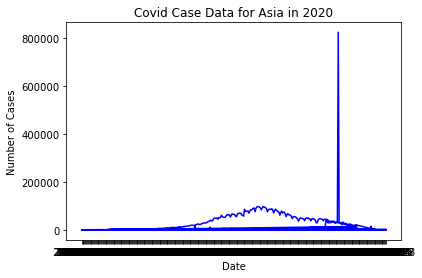

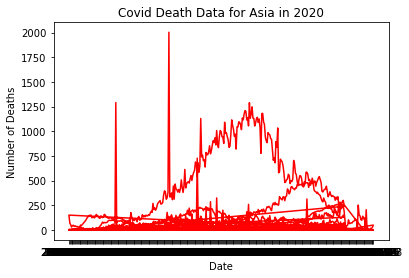

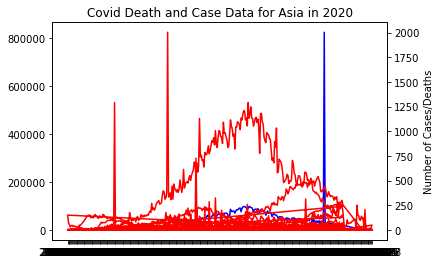

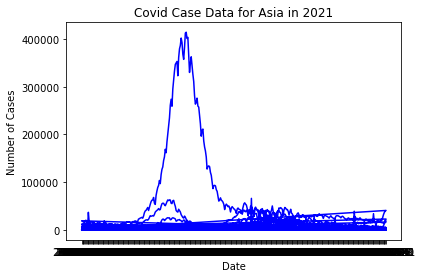

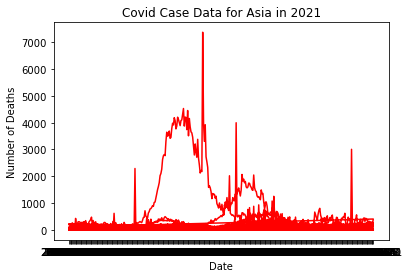

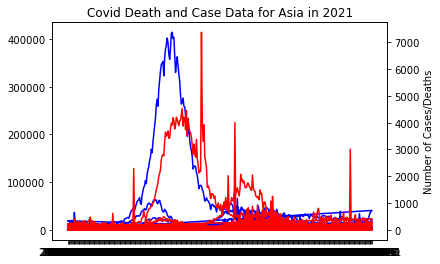

In [32]:
df2021asia = df2021[df2021['continent'] == "Asia"]
df2020asia = df2020[df2020['continent'] == "Asia"]

########################################

plt.plot(df2020asia['date'], df2020asia['dcases'], color = 'b')
plt.title("Covid Case Data for Asia in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2020asia['date'], df2020asia['ddeaths'], color = 'r')
plt.title("Covid Death Data for Asia in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x_asia2020 = df2020asia['date']
y1_asia2020 = df2020asia['dcases']
y2_asia2020 = df2020asia['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x_asia2020,y1_asia2020, color = 'b')
curve2 = ax2.plot(x_asia2020,y2_asia2020, color = 'r')
plt.title("Covid Death and Case Data for Asia in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")

plt.plot()
plt.show()

########################################

plt.plot(df2021asia['date'], df2021asia['dcases'], color = 'b')
plt.title("Covid Case Data for Asia in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2021asia['date'], df2021asia['ddeaths'], color = 'r')
plt.title("Covid Case Data for Asia in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x_asia2021 = df2021asia['date']
y1_asia2021 = df2021asia['dcases']
y2_asia2021 = df2021asia['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x_asia2021,y1_asia2021, color = 'b')
curve2 = ax2.plot(x_asia2021,y2_asia2021, color = 'r')
plt.title("Covid Death and Case Data for Asia in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")

plt.plot()
plt.show()

#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

Asia presents an abnormal trend in its cases and deaths from year to year. For one, there seems to be an issue in the data as shown by the unrealistic spike in cases in 2020. Despite it eclipsing the rest of the data because it alters the scaling, we can deduce that Asia had its cases spread out. This makes sense, as countries such as China and South Korea are already well-known for wearing masks as social courtesy for when one is sick and as a preventative measure when weather conditions render unfiltered breathing a potential health risk, especially to those with respiratory diseases such as asthma or pneumonia. As such, these countries enjoyed a relative acceptance of health-preserving protocols such as social distancing and quarantining. This led to health workers being able to control the flow of patients and treat them in a timely manner, preventing an overwhelming of the medical system. This all culminated in a slightly lower death rate spread out across 2020.

2021 saw Asia experience a more drastic increase in cases concentrated in a relatively short amount of time. This could be due to a relaxing of health precautions. It does seem that the death rate was mixed; sometimes overpowering and sometimes going below the rate of cases.

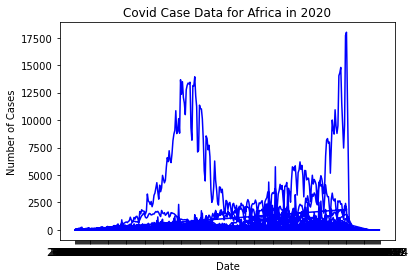

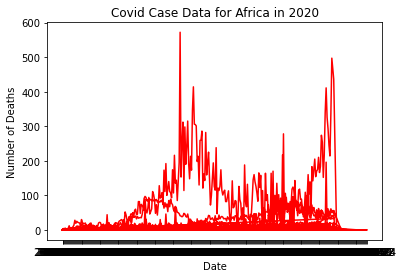

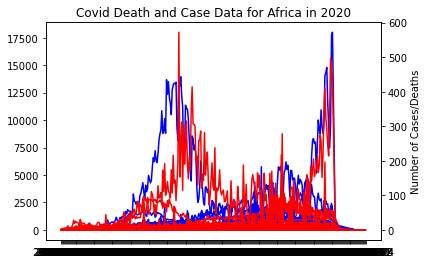

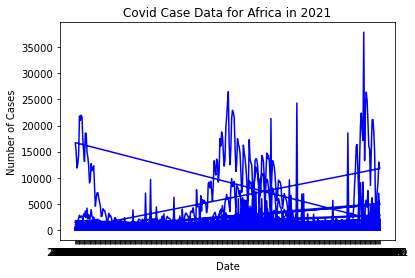

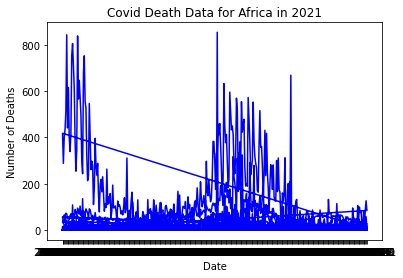

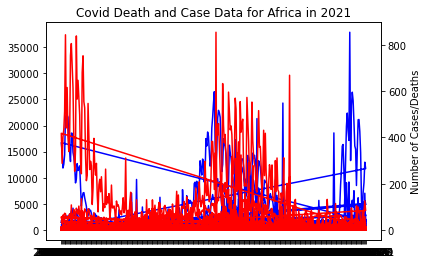

In [33]:
df2021afr = df2021[df2021['continent'] == "Africa"]
df2020afr = df2020[df2020['continent'] == "Africa"]

plt.plot(df2020afr['date'], df2020afr['dcases'], color = 'b')
plt.title("Covid Case Data for Africa in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2020afr['date'], df2020afr['ddeaths'], color = 'r')
plt.title("Covid Case Data for Africa in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x_afr2020 = df2020afr['date']
y1_afr2020 = df2020afr['dcases']
y2_afr2020 = df2020afr['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x_afr2020,y1_afr2020, color = 'b')
curve2 = ax2.plot(x_afr2020,y2_afr2020, color = 'r')
plt.title("Covid Death and Case Data for Africa in 2020")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")
plt.plot()
plt.show()

########################################

plt.plot(df2021afr['date'], df2021afr['dcases'], color = 'b')
plt.title("Covid Case Data for Africa in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2021afr['date'], df2021afr['ddeaths'], color = 'b')
plt.title("Covid Death Data for Africa in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x_afr2021 = df2021afr['date']
y1_afr2021 = df2021afr['dcases']
y2_afr2021 = df2021afr['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x_afr2021,y1_afr2021, color = 'b')
curve2 = ax2.plot(x_afr2021,y2_afr2021, color = 'r')
plt.title("Covid Death and Case Data for Africa in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")

plt.plot()
plt.show()

#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

Africa's data seems to be inconsistent with previous theories relating average age with death rate. In the graph, we see Africa's death rate being consistent and sometimes overpowering its case rate. I think this is because of the lack of healthcare found in Africa because of its low-income status.

# MENA and North Africa

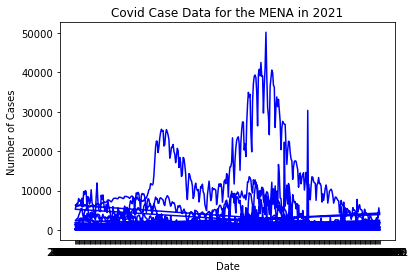

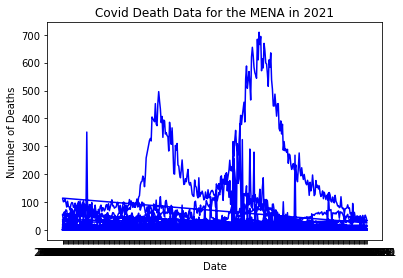

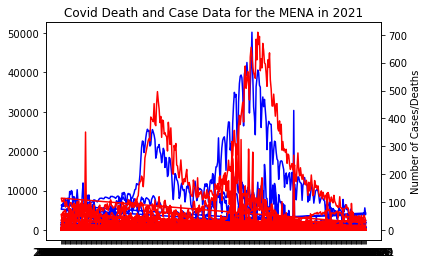

In [34]:
df2021mena = df2021[df2021['region'] == "Middle East & North Africa"]


plt.plot(df2021mena['date'], df2021mena['dcases'], color = 'b')
plt.title("Covid Case Data for the MENA in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2021mena['date'], df2021mena['ddeaths'], color = 'b')
plt.title("Covid Death Data for the MENA in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x_mena2021 = df2021mena['date']
y1_mena2021 = df2021mena['dcases']
y2_mena2021 = df2021mena['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x_mena2021,y1_mena2021, color = 'b')
curve2 = ax2.plot(x_mena2021,y2_mena2021, color = 'r')
plt.title("Covid Death and Case Data for the MENA in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")

plt.plot()
plt.show()

#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

It seems the MENA's region is straight down the middle when it comes to death rate vs case rate; both coincide quite neatly. It also has a death rate similar to that of the general population. I hypothesize this to be the case because the average age in MENA countries is closer to the global average than higher-income nations

# North America (Region)

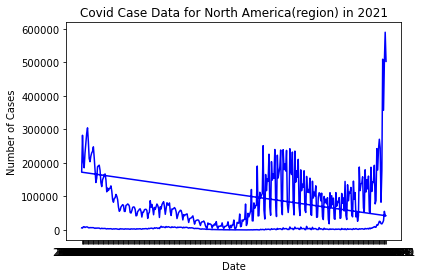

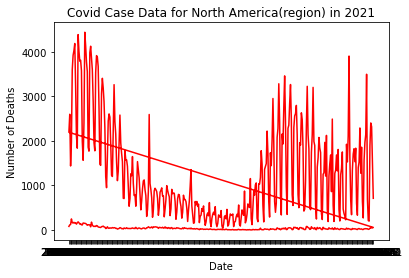

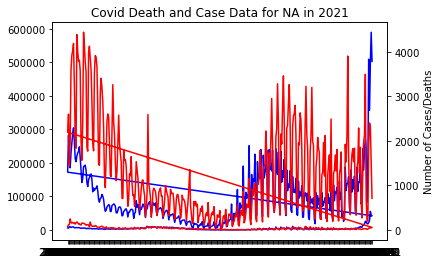

In [36]:
df2021nam = df2021[df2021['region'] == "North America(region)"]


plt.plot(df2021nam['date'], df2021nam['dcases'], color = 'b')
plt.title("Covid Case Data for North America(region) in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

plt.plot(df2021nam['date'], df2021nam['ddeaths'], color = 'r')
plt.title("Covid Case Data for North America(region) in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.show()


x_nam2021 = df2021nam['date']
y1_nam2021 = df2021nam['dcases']
y2_nam2021 = df2021nam['ddeaths']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

curve1 = ax1.plot(x_nam2021,y1_nam2021, color = 'b')
curve2 = ax2.plot(x_nam2021,y2_nam2021, color = 'r')
plt.title("Covid Death and Case Data for NA in 2021")
plt.xlabel("Date")
plt.ylabel("Number of Cases/Deaths")

plt.plot()
plt.show()

#with help from the esteemed clueple c -- https://www.youtube.com/watch?v=shNqNYMAAx0&ab_channel=clueplec)

In this graph of North America, we see that, similarly to other high-income regions, death rates soar above case rate because of age skewness. What I'd like to add is that NA has the highest number of cases I've seen on this dataset – a whopping 600,000 cases! I'm not surprised though, given the rise of the Omicron variant at the end of 2021 and the popularity of NA as travel places. This is very different to the Asia graph and shows how much a difference in location can make.

I'd like to end this analysis by commenting that it is important to look at the data in the context of what happened in the real world; one simply cannot overlook the number of variables involved in a global pandemic! I think the differences in age and public perception of global health struggles have shaped the lives of every person on Earth and we can use Data Science as a tool to show this effect in an easy-to-digest way. In the right hands Data Science can have a positive or negative influence on people's lives; math is objective, but whether we use it for good or for evil is up to us. 